In [2]:
import os
import sys
import time
import datetime
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import tushare as ts

sys.path.append('../Codes')
import tools
from SingleFactor import SingleFactor

In [29]:
industry_list = ['801030.SI', '801080.SI', '801150.SI', '801730.SI', '801750.SI', '801760.SI', '801770.SI', '801890.SI']

In [30]:
#获取股票
stocks = tools.get_stocks()
#获取行业
industrys = tools.get_industrys(level='L1', stocks=stocks)

In [31]:
industrys = {k:industrys[k] for k in industry_list}
stocks = []
for v in industrys.values():
    stocks.extend(v)
stocks.sort()

In [111]:
class A(SingleFactor):
    def generate_factor(self):
        CLOSE = DataFrame({stock:pd.read_csv('../../DataBase/StockDailyData/Stock/%s.csv'%stock, index_col=[0], parse_dates=[0]).loc[:, 'close'] for stock in stocks})
        amount = DataFrame({stock:pd.read_csv('../../DataBase/StockDailyData/Stock/%s.csv'%stock, index_col=[0], parse_dates=[0]).loc[:, 'amount'] for stock in stocks})
        volume = DataFrame({stock:pd.read_csv('../../DataBase/StockDailyData/Stock/%s.csv'%stock, index_col=[0], parse_dates=[0]).loc[:, 'vol'] for stock in stocks})
        average_price = amount / volume * 10
        
        ADJ = DataFrame({stock:pd.read_csv('../../DataBase/StockDailyData/Stock/%s.csv'%stock, index_col=[0], parse_dates=[0]).loc[:, 'adj_factor'] for stock in stocks})
        CLOSE = np.log(CLOSE * ADJ)
        average_price = np.log(average_price * ADJ)
        
        TURNRATE = DataFrame({stock:pd.read_csv('../../DataBase/StockTradingDerivativeData/Stock/%s.csv'%stock, index_col=[0], parse_dates=[0]).loc[:, 'TURNRATE'] for stock in stocks})
        TURNRATE[TURNRATE>0.99] = 0.99
        TURNRATE /= 64
        p = (1-TURNRATE).prod() / (1-TURNRATE).cumprod() * TURNRATE
        
        cum_p = p.cumsum()
        
        m1 = (average_price**1 * p).cumsum() / cum_p
        m2 = (average_price**2 * p).cumsum() / cum_p
        #m3 = (average_price**3 * p).cumsum() / cum_p
        #m4 = (average_price**4 * p).cumsum() / cum_p
        
        #v1 = 0
        v2 = m2 - m1**2
        v2[v2<1e-6] = np.nan
        #v3 = m3 - 3*m2*m1 + 2*m1**3
        #v4 = m4 - 4*m3*m1 + 6*m2*m1**2 - 3*m1**4
        
        #a = CLOSE / m1
        a = v2 / m1
        a = np.log(a)
        #a = v3 / (v2**1.5)
        #a = v4 / (v2**3) - 3
        
        a = a.loc[a.index >= self.start_date, :]
        a = a.loc[a.index <= self.end_date, :]
        self.factor = a

In [112]:
a = A('ChipsCV', stocks=stocks, start_date='20200101', end_date='20201130')

In [113]:
a.generate_factor()

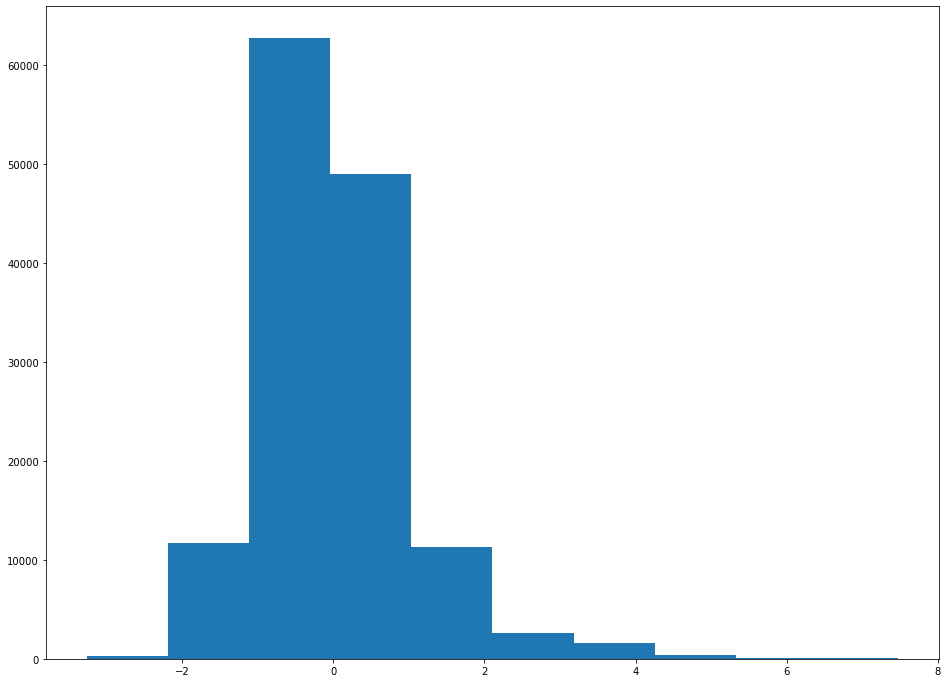

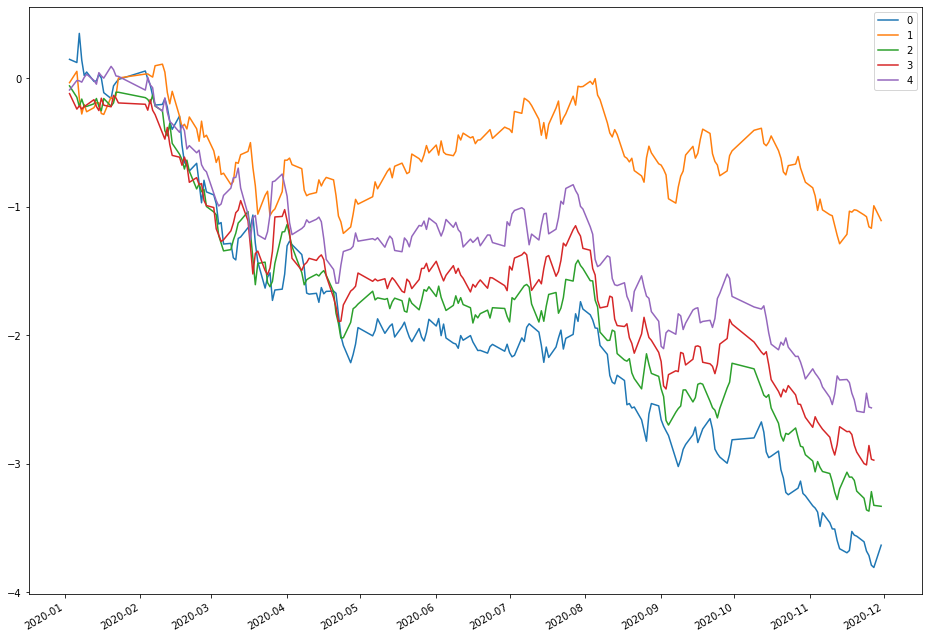

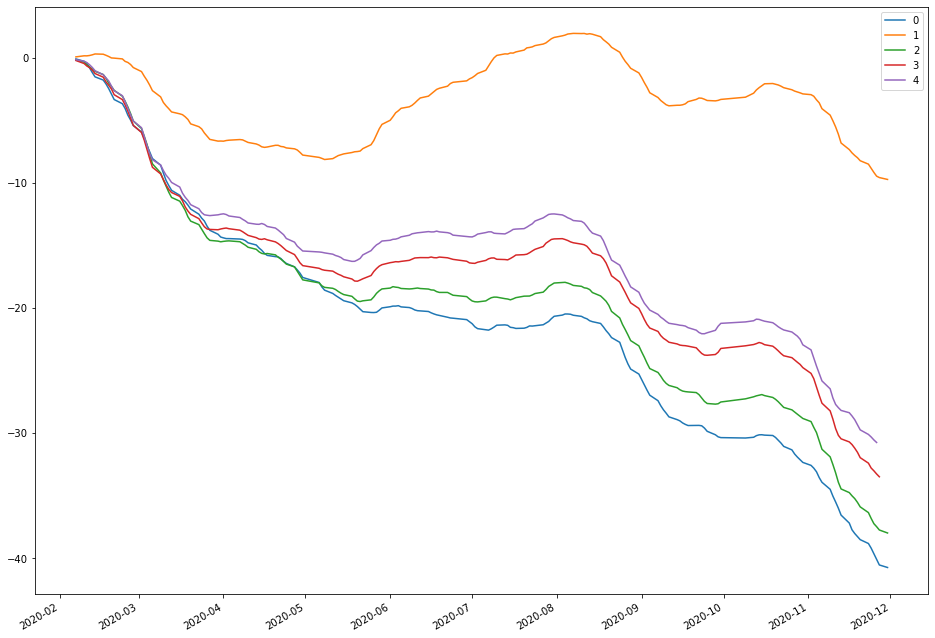

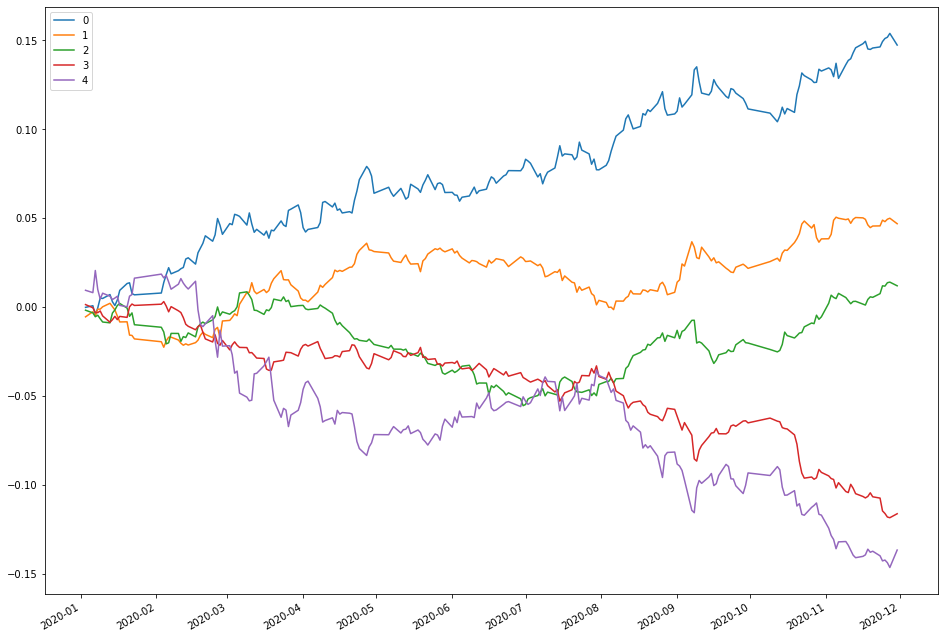

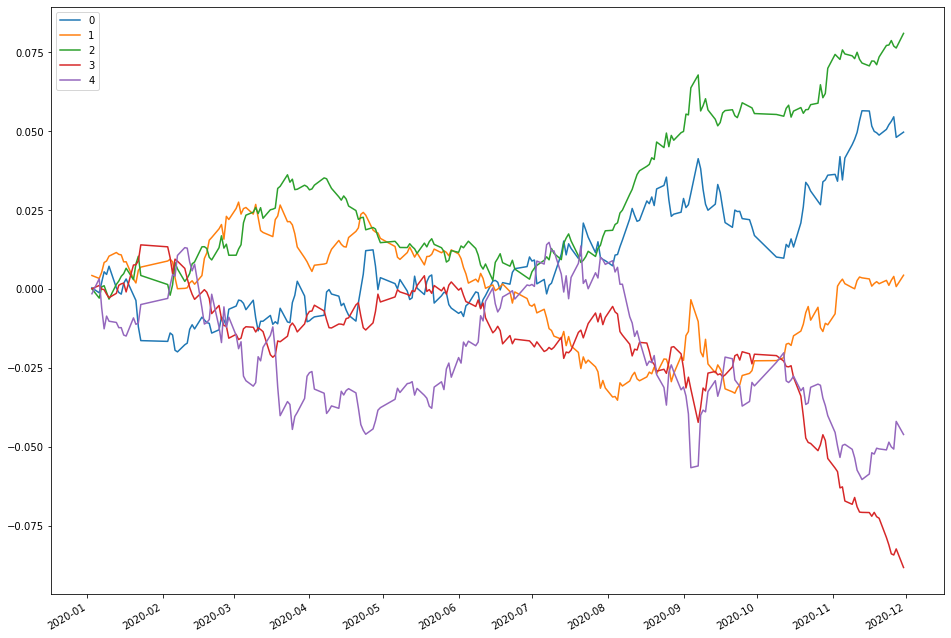

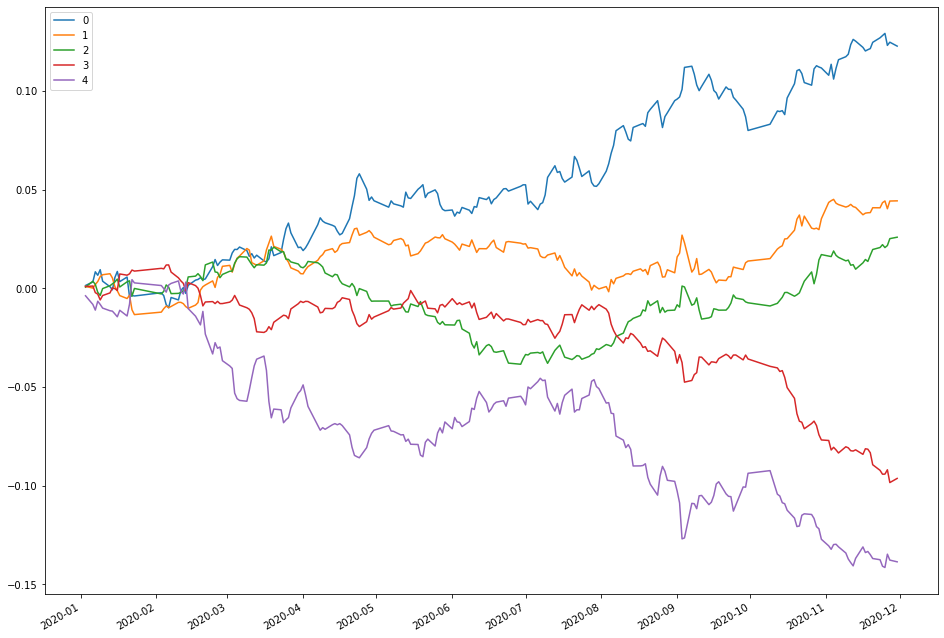

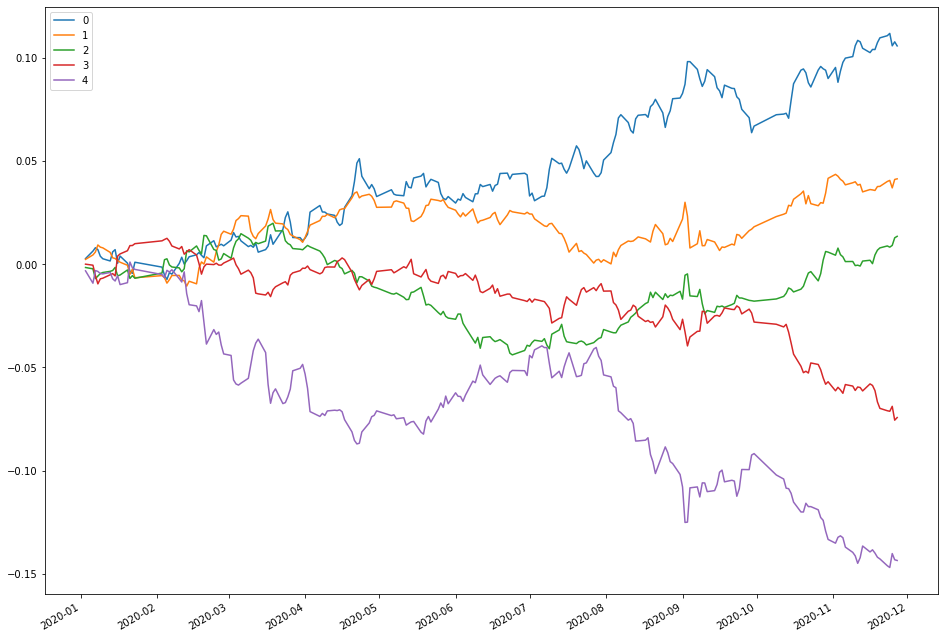

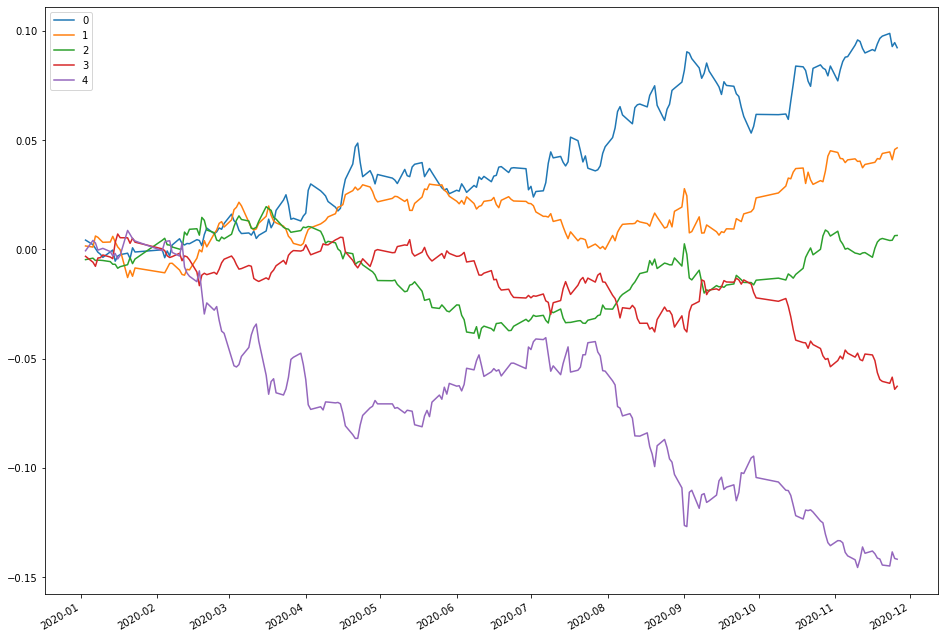

In [114]:
a.factor_analysis()

In [115]:
a.factor

,300001.SZ,300002.SZ,300003.SZ,300004.SZ,300006.SZ,300007.SZ,300009.SZ,300010.SZ,300011.SZ,300014.SZ,...,300822.SZ,300823.SZ,300827.SZ,300830.SZ,300831.SZ,300832.SZ,300833.SZ,300836.SZ,300837.SZ,300838.SZ
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-11.513095,-11.137768,-12.347676,-9.538157,-8.336049,-12.603665,NaN,-9.948911,-13.174160,-9.883613,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,-8.470684,-10.067476,-12.288233,-9.827531,-7.597692,-12.159505,-15.361310,-10.257956,-11.374752,-9.404548,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,-8.005861,-8.786021,-11.004786,-8.606188,-7.367380,-10.855133,-11.311940,-9.520489,-10.380527,-9.446134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,-7.682163,-8.577416,-10.691793,-8.754010,-7.261831,-11.023179,-11.266588,-9.449399,-10.250870,-9.569580,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-24,-6.569314,-5.369641,-5.772221,-4.774402,-4.798707,-5.842690,-5.751185,-5.029386,-5.919507,-5.095877,...,-5.996031,-5.647026,-5.207397,-6.328203,-5.278253,-6.160985,-6.625623,-6.523795,-5.606994,-6.795024
2020-11-25,-6.479836,-5.384771,-5.750314,-4.790691,-4.800103,-5.858380,-5.766282,-4.998204,-5.935740,-5.081451,...,-5.886240,-5.662015,-5.221767,-6.340017,-5.294254,-6.163153,-6.605754,-6.531071,-5.610765,-6.802788
2020-11-26,-6.405930,-5.400041,-5.728996,-4.806324,-4.808486,-5.874166,-5.777825,-4.960238,-5.951586,-5.075508,...,-5.813726,-5.678648,-5.235710,-6.345862,-5.307378,-6.158819,-6.578016,-6.542445,-5.612654,-6.795198
2020-11-27,-6.327785,-5.415499,-5.711614,-4.821220,-4.817479,-5.889452,-5.792060,-4.921430,-5.966748,-5.070017,...,-5.715979,-5.695461,-5.247551,-6.344405,-5.318436,-6.158641,-6.543200,-6.560563,-5.621507,-6.772759
